In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn



data = pd.read_csv('IMDB.csv')
x_train = data['review'].values
y_train = data['sentiment'].values
y_train = [[1,0] if x == "positive" else [0,1] for x in y_train]

import re
def clean_text(text):
  if type(text)!=str:
    return str(text)
  return re.sub(r'[^0-9A-Za-z" "]','',text)
x_train = [clean_text(here) for here in x_train]
save =[]

for each_sentence in x_train:
  save.append(each_sentence.split(" "))
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())


#verb,noun,adjective,satellite adverb



adjwords = set([x for x in words if len(wn.synsets(x)) > 0 and wn.synsets(x)[0].pos() in ['v', 'n', 'a', 's']])



In [2]:
x_train = []
for each_sentence in save:
  filtered_sentence = [lemmatizer.lemmatize(x.lower()) for x in each_sentence if x.lower() not in stop_words]
  x_train.append(" ".join([x for x in filtered_sentence if x in adjwords]))
x_train

['one reviewer watching episode hooked right first thing struck brutality unflinching scene violence set right word go trust show faint timid show pull punch regard drug sex violence classic use nickname given maximum security state focus emerald city experimental section prison cell glass front face privacy high agenda em city home scuffle death stare dodgy dealing shady agreement far say main appeal show due fact go show dare forget pretty picture painted audience forget charm forget mess first episode saw struck nasty say ready watched taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching may become comfortable uncomfortable get touch side',
 'wonderful little production technique unassuming fashion give comforting sense realism entire piece actor well chosen sheen got voice pat see seamless reference diary entry we

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train

['one reviewer watching episode hooked right first thing struck brutality unflinching scene violence set right word go trust show faint timid show pull punch regard drug sex violence classic use nickname given maximum security state focus emerald city experimental section prison cell glass front face privacy high agenda em city home scuffle death stare dodgy dealing shady agreement far say main appeal show due fact go show dare forget pretty picture painted audience forget charm forget mess first episode saw struck nasty say ready watched taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching may become comfortable uncomfortable get touch side',
 'wonderful little production technique unassuming fashion give comforting sense realism entire piece actor well chosen sheen got voice pat see seamless reference diary entry we

In [4]:
word_index = tokenizer.word_index
word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'time': 5,
 'good': 6,
 'character': 7,
 'even': 8,
 'get': 9,
 'story': 10,
 'make': 11,
 'see': 12,
 'scene': 13,
 'much': 14,
 'well': 15,
 'people': 16,
 'great': 17,
 'bad': 18,
 'first': 19,
 'show': 20,
 'way': 21,
 'thing': 22,
 'made': 23,
 'think': 24,
 'go': 25,
 'life': 26,
 'know': 27,
 'watch': 28,
 'many': 29,
 'love': 30,
 'seen': 31,
 'two': 32,
 'actor': 33,
 'say': 34,
 'plot': 35,
 'look': 36,
 'acting': 37,
 'end': 38,
 'best': 39,
 'little': 40,
 'year': 41,
 'take': 42,
 'better': 43,
 'come': 44,
 'still': 45,
 'man': 46,
 'work': 47,
 'part': 48,
 'find': 49,
 'want': 50,
 'give': 51,
 'lot': 52,
 'back': 53,
 'director': 54,
 'watching': 55,
 'real': 56,
 'performance': 57,
 'guy': 58,
 'play': 59,
 'woman': 60,
 'another': 61,
 'funny': 62,
 'nothing': 63,
 'going': 64,
 'role': 65,
 'u': 66,
 'every': 67,
 'new': 68,
 'old': 69,
 'cant': 70,
 'cast': 71,
 'point': 72,
 'girl': 73,
 'fact': 74,
 'pretty': 75,
 

In [5]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train

[[3,
  808,
  55,
  139,
  2193,
  88,
  19,
  22,
  2238,
  3596,
  8282,
  13,
  383,
  104,
  88,
  202,
  25,
  1209,
  20,
  4372,
  6713,
  20,
  714,
  1591,
  1582,
  499,
  233,
  383,
  183,
  199,
  5919,
  197,
  4434,
  1811,
  468,
  597,
  11788,
  336,
  3217,
  1526,
  836,
  1583,
  1445,
  637,
  193,
  8991,
  187,
  3043,
  2591,
  336,
  201,
  11512,
  179,
  2848,
  4629,
  1285,
  5263,
  5264,
  113,
  34,
  147,
  837,
  20,
  432,
  74,
  25,
  20,
  1866,
  544,
  75,
  195,
  2933,
  131,
  544,
  912,
  544,
  654,
  19,
  139,
  93,
  2238,
  1133,
  34,
  1112,
  151,
  771,
  82,
  5988,
  187,
  353,
  990,
  383,
  383,
  4138,
  4435,
  1504,
  2067,
  12487,
  3527,
  219,
  365,
  9,
  123,
  15,
  5806,
  502,
  487,
  3527,
  430,
  836,
  3866,
  432,
  267,
  483,
  937,
  836,
  309,
  55,
  86,
  254,
  2575,
  2260,
  9,
  626,
  284],
 [232,
  40,
  190,
  1258,
  9360,
  1061,
  51,
  7377,
  156,
  1407,
  258,
  188,
  33,
  15,
  1634,

In [6]:
max_len = max(len(sentences) for sentences in x_train)
max_len

999

In [7]:
max_len = max(len(sentences) for sentences in x_train)
x_train = pad_sequences(x_train,max_len)
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [8]:
wordvec = word2vec.Word2Vec(save,vector_size = 50)

In [9]:
from collections import defaultdict
def create_word_embedding(wordvec,word_index):
  word_embedding = defaultdict()
  for x,y in word_index.items():
    
    try:
      word_embedding[y] = np.array(wordvec[x])
    except:
      word_embedding[y] = np.random.rand(50)
    
  return word_embedding


In [10]:
word_embedding = create_word_embedding(wordvec,word_index)
word_embedding[0] = np.zeros(50)

In [11]:
x_train = [[word_embedding[x] for x in here] for here in x_train]

In [12]:
len(x_train)

50000

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [14]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

'''We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics 
we’d like to measure. Specify the appropriate parameters, including at least one metric ‘accuracy’.'''
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

#Calculate Accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'Sequential' is not defined

In [15]:
#to start amodel i.e add layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = keras.Sequential()

In [16]:
#    Conv1D: This is the 1D convolutional layer in Keras.
 #   kernel_size=3: The size of the convolutional kernel (filter). In this case, it's a 1D kernel with a size of 3.
  #  input_shape=(20, 50): Specifies the shape of the input data. Assuming your input data is a sequence with 20 time steps and each step has a feature vector of size 50.
   # filters=64: The number of filters (output channels) in the convolution.
model.add(keras.layers.Conv1D(kernel_size=3,input_shape = (20,50),filters = 64))

In [17]:
#specified 128 units in the LSTM layer:
model.add(keras.layers.LSTM(128))

In [18]:
#Adding a Flatten layer to your Keras Sequential model is a common step, especially when transitioning from convolutional or recurrent layers to dense layers. 
#The Flatten layer is used to flatten the input, 
#converting it from a multi-dimensional tensor to a one-dimensional tensor, which can then be fed into dense layers.""
model.add(keras.layers.Flatten())

In [19]:
#The softmax activation function is commonly used in the output layer of a classification model.
#It converts the raw output scores into probabilities, making it easier to interpret the model's predictions.
model.add(keras.layers.Dense(2, activation='softmax'))

In [20]:
#The loss function is a measure of how well the model is performing. In binary classification tasks (where there are two classes), binary_crossentropy is commonly used. It calculates the cross-entropy loss between the true labels and the predicted probabilities.
#This loss is well-suited for binary classification problems.
model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics=['acc'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 64)            9664      
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 108738 (424.76 KB)
Trainable params: 108738 (424.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
x_train = np.array(x_train)
x_test = np.array(x_test)

MemoryError: Unable to allocate 14.9 GiB for an array with shape (40000, 999, 50) and data type float64

In [23]:
print(x_train.shape,x_test.shape)

AttributeError: 'list' object has no attribute 'shape'

In [57]:
#This is a common preprocessing step when working with convolutional neural networks (CNNs) that expect input data in the form of 3D tensors, 
#where the dimensions correspond to the height, width, and channels.
x_train = x_train.reshape(x_train.shape[0], 20, 50,1)
x_test = x_test.reshape(x_test.shape[0], 20 , 50 ,1)

In [58]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
history = model.fit(x_train, y_train, epochs=15, batch_size=8, validation_data=(x_test, y_test))


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'int\'>"})'})

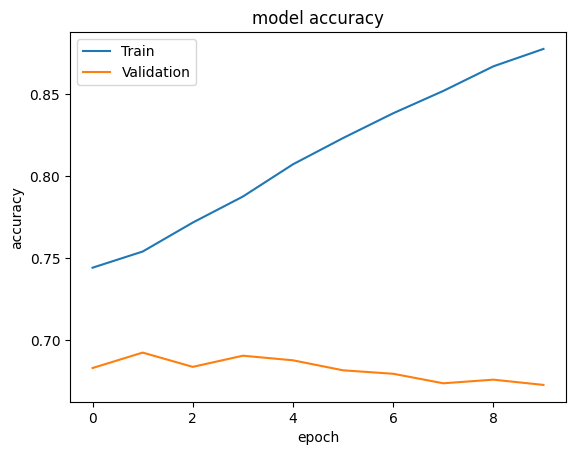

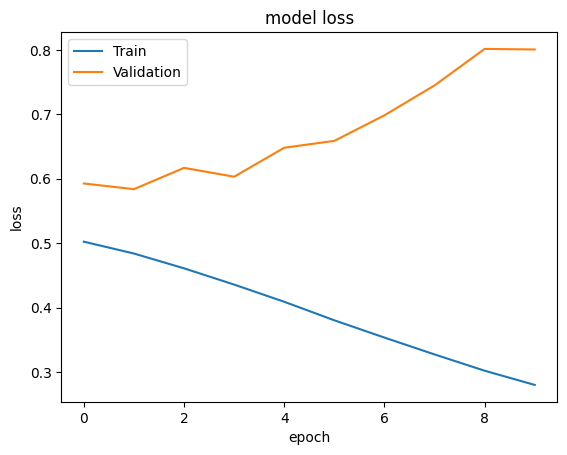

In [78]:
history = model.history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
from sklearn.metrics import classification_report

# Assuming model is trained and you have x_test and y_test
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification

# Print classification report
print(classification_report(y_test, y_pred_binary))


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      5002
           1       0.68      0.65      0.67      4998

   micro avg       0.67      0.67      0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000
 samples avg       0.67      0.67      0.67     10000



In [80]:
from sklearn.metrics import accuracy_score

# Assuming model is trained and you have x_train, y_train, x_test, and y_test
y_pred_train = model.predict(x_train)
y_pred_binary_train = (y_pred_train > 0.5).astype(int)

y_pred_test = model.predict(x_test)
y_pred_binary_test = (y_pred_test > 0.5).astype(int)

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_binary_train)
print(f'Accuracy on training data: {accuracy_train:.4f}')

# Calculate accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_binary_test)
print(f'Accuracy on testing data: {accuracy_test:.4f}')


313/313 [==============================] - 3s 9ms/step
Accuracy on training data: 0.9040
Accuracy on testing data: 0.6728


Confusion Matrix:
[[3457 1545]
 [1727 3271]]


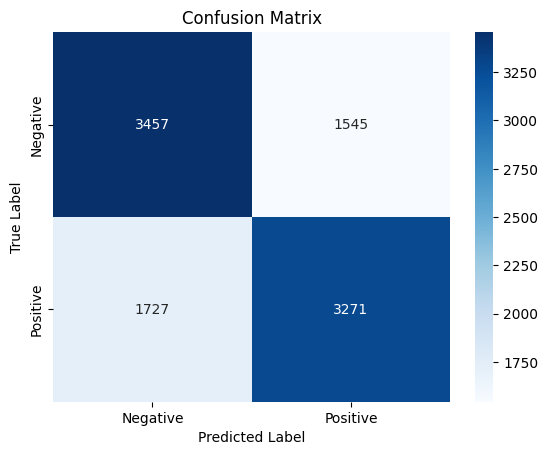

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
from sklearn.metrics import confusion_matrix
# Assuming y_test is in one-hot encoded format
y_test_single = np.argmax(y_test, axis=1)

# Assuming y_pred_binary_test is in one-hot encoded format
y_pred_single = np.argmax(y_pred_binary_test, axis=1)

# Now, calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_single, y_pred_single)

# Assuming you have y_test (true labels) and y_pred_binary_test (predicted labels)
#conf_matrix = confusion_matrix(y_test, y_pred_binary_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

# Load data
data = pd.read_csv('IMDB.csv')
x_train = data['review'].values
y_train = data['sentiment'].values
y_train = [[1, 0] if x == "positive" else [0, 1] for x in y_train]

# Clean text
import re
def clean_text(text):
    if type(text) != str:
        return str(text)
    return re.sub(r'[^0-9A-Za-z" "]', '', text)

x_train = [clean_text(here) for here in x_train]
save = []

for each_sentence in x_train:
    save.append(each_sentence.split(" "))

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())
adjwords = set([x for x in words if len(wn.synsets(x)) > 0 and wn.synsets(x)[0].pos() in ['v', 'n', 'a', 's']])

x_train = []
for each_sentence in save:
    filtered_sentence = [lemmatizer.lemmatize(x.lower()) for x in each_sentence if x.lower() not in stop_words]
    x_train.append(" ".join([x for x in filtered_sentence if x in adjwords]))

# Tokenization and padding
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
x_train = tokenizer.texts_to_sequences(x_train)
max_len = max(len(sentences) for sentences in x_train)
x_train = pad_sequences(x_train, maxlen=20)

# Word embeddings
wordvec = word2vec.Word2Vec(save, vector_size=50)

def create_word_embedding(wordvec, word_index):
    word_embedding = {}
    for x, y in word_index.items():
        try:
            word_embedding[y] = np.array(wordvec[x])
        except:
            word_embedding[y] = np.random.rand(50)
    return word_embedding

word_embedding = create_word_embedding(wordvec, word_index)
word_embedding[0] = np.zeros(50)
x_train = np.array([[word_embedding[x] for x in here] for here in x_train])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

# Model
model = keras.Sequential()
model.add(keras.layers.Conv1D(kernel_size=3, input_shape=(20, 50), filters=64))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['acc'])

# Reshape data
x_train = x_train.reshape(x_train.shape[0], 20, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 20, 50, 1)

# Model training
history = model.fit(x_train, np.array(y_train), epochs=15, batch_size=8, validation_data=(x_test, np.array(y_test)))


Epoch 1/50
5000/5000 [==============================] - 87s 17ms/step - loss: 0.6868 - acc: 0.5347 - val_loss: 0.6601 - val_acc: 0.5963
Epoch 2/50
3571/5000 [====================>.........] - ETA: 20s - loss: 0.6417 - acc: 0.6070

In [6]:
from sklearn.metrics import classification_report

# Assuming model is trained and you have x_test and y_test
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification

# Print classification report
print(classification_report(y_test, y_pred_binary))


313/313 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      5016
           1       0.68      0.67      0.67      4984

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000
 samples avg       0.68      0.68      0.68     10000



In [7]:
from sklearn.metrics import accuracy_score

# Assuming model is trained and you have x_train, y_train, x_test, and y_test
y_pred_train = model.predict(x_train)
y_pred_binary_train = (y_pred_train > 0.5).astype(int)

y_pred_test = model.predict(x_test)
y_pred_binary_test = (y_pred_test > 0.5).astype(int)

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_binary_train)
print(f'Accuracy on training data: {accuracy_train:.4f}')

# Calculate accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_binary_test)
print(f'Accuracy on testing data: {accuracy_test:.4f}')


313/313 [==============================] - 3s 9ms/step
Accuracy on training data: 0.8262
Accuracy on testing data: 0.6774


In [24]:
import speech_recognition as sr

def indentify_speech():
    recog=sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak Anything :")
        recog.adjust_for_ambient_noise(source)
        try:
            audio=recog.listen(source)
            print("audio recording completed")
            print(audio)
            txt=recog.recognize_google(audio)
            #print(f"Transcription:{txt}")
        except Exception as e:
            print("An unknown exception has occurred")
    return txt

ModuleNotFoundError: No module named 'speech_recognition'

In [26]:
%pip install SpeechRecognition


  Obtaining dependency information for SpeechRecognition from https://files.pythonhosted.org/packages/73/8c/74d3b2a7d71e3f18e1e50bf3f168cf3333846137f5723efac3d0dc5a8635/SpeechRecognition-3.10.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.8 MB 1.5 MB/s eta 0:00:22
    --------------------------------------- 0.7/32.8 MB 6.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.0/32.8 MB 7.9 MB/s eta 0:00:05
   - ---------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip
